# APPROACH 2

## Import Data and Globals:

In [1]:
import sys
import os
import random as rd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

raw_data_folder = os.path.abspath('/home/siedan/programming/masterarbeit/code/analysis/raw_data')

def load_df(name):
    return pd.read_csv(os.path.join(raw_data_folder, name))

df = load_df('adapted_data.csv').drop(['Unnamed: 0'], axis =1)
df1 = df.copy(deep = True)

features = ['year','Studienjahr', 'active_year_before', 'geschlecht', 'status_year_before', 'country', 'school', 'subject', 'active_dummy', 'status_key']

### Data:

In [2]:
def active_year_before(df): 
    list_studienjahre = list(df['year'].unique())
    list_studienjahre.sort()
    for i in list_studienjahre[1:]:
        df_year = df.query('year == @i')
        df_year0 = df.query('year == (@i-1)')
        for num in df_year.index:
            if df_year.loc[num, 'Studienjahr'] > 1:
                matrikel = df_year.loc[num, 'matrikel_num']
                if (num-1) in df_year0.index and df_year0.loc[(num-1), 'matrikel_num'] == matrikel:
                    df.loc[num, 'active_year_before'] = df.loc[(num-1), 'active_dummy']
                    df.loc[num, 'status_year_before'] = df.loc[(num-1), 'status_key']
            
    return df

def country(df):
    for i in range(len(df)):
        if df.loc[i, 'styria_dummy'] == 1:
            df.loc[i, 'country'] = 0
        elif df.loc[i, 'not_styria_dummy'] == 1:
            df.loc[i, 'country'] = 1
        elif df.loc[i, 'germany_dummy'] == 1:
            df.loc[i, 'country'] = 2
        else:
            df.loc[i, 'country'] = 3
    return df

def school(df):
    for i in range(len(df)):
        if df.loc[i, 'AHS_dummy'] == 1:
            df.loc[i, 'school'] = 0
        elif df.loc[i, 'BHS_dummy'] == 1:
            df.loc[i, 'school'] = 1
        else:
            df.loc[i, 'school'] = 2
    return df

def subject(df):
    for i  in range(len(df)):
        if df.loc[i, 'jus_dummy'] == 1:
            df.loc[i, 'subject'] = 0
        elif df.loc[i, 'bwl_dummy'] == 1:
            df.loc[i, 'subject'] = 1
        else:
            df.loc[i, 'subject'] = 2
    return df

In [3]:

active_year_before(df)
country(df)
school(df)
subject(df)



,matrikel_num,Studienjahr,geschlecht,avgECTS_sem_before,ects_year_before,year,first_exam_negative,AHS_dummy,BHS_dummy,ausland_vorbildung_dummy,...,cum_ects_pos_before,status_key,ECTS_year,SWS_year,active_dummy,subject,active_year_before,status_year_before,country,school
0,3564,13.0,0,0.041667,NaN,16,0.0,1,0,0,...,1.0,I,0.0,0.0,0,0,NaN,NaN,1.0,0.0
1,3564,14.0,0,0.038462,0.0,17,0.0,1,0,0,...,1.0,I,0.0,0.0,0,0,0.0,I,1.0,0.0
2,3564,15.0,0,0.035714,0.0,18,0.0,1,0,0,...,1.0,Z,0.0,0.0,0,0,0.0,I,1.0,0.0
3,7834,11.0,1,5.475000,NaN,15,1.0,1,0,0,...,109.5,X,0.0,0.0,1,0,NaN,NaN,1.0,0.0
4,10035,10.0,0,1.441176,NaN,17,0.0,0,0,1,...,24.5,I,0.0,0.0,0,0,NaN,NaN,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39937,51866425,1.0,0,0.000000,NaN,18,0.0,1,0,0,...,0.0,I,8.0,5.0,0,2,NaN,NaN,0.0,0.0
39938,51866425,2.0,0,8.000000,8.0,19,0.0,1,0,0,...,8.0,I,7.0,4.0,0,2,0.0,I,0.0,0.0
39939,51871418,1.0,0,0.000000,NaN,19,1.0,0,1,0,...,0.0,I,29.0,19.0,1,1,NaN,NaN,0.0,1.0
39940,51907081,1.0,1,0.000000,NaN,19,1.0,1,0,0,...,0.0,I,16.0,9.0,1,1,NaN,NaN,0.0,0.0


In [4]:
df_working = df[features]

In [5]:
df_working

,year,Studienjahr,active_year_before,geschlecht,status_year_before,country,school,subject,active_dummy,status_key
0,16,13.0,NaN,0,NaN,1.0,0.0,0,0,I
1,17,14.0,0.0,0,I,1.0,0.0,0,0,I
2,18,15.0,0.0,0,I,1.0,0.0,0,0,Z
3,15,11.0,NaN,1,NaN,1.0,0.0,0,1,X
4,17,10.0,NaN,0,NaN,3.0,2.0,0,0,I
...,...,...,...,...,...,...,...,...,...,...
39937,18,1.0,NaN,0,NaN,0.0,0.0,2,0,I
39938,19,2.0,0.0,0,I,0.0,0.0,2,0,I
39939,19,1.0,NaN,0,NaN,0.0,1.0,1,1,I
39940,19,1.0,NaN,1,NaN,0.0,0.0,1,1,I


In [32]:
def create_combinations():
    return_list = []
    for a in range(2):
        for b in range(3):
            for c in range(4):
                for d in range(3):
                    return_list.append([a,b,c,d])
    return return_list

numerical_combinations = create_combinations()
print(len(numerical_combinations))

def split(df, combinations):
    return_list = []
    for i in combinations:
        geschlecht = i[0]
        subject = i[1]
        country = i[2]
        school = i[3]
        
        df_append = df.query('geschlecht == @geschlecht and subject == @subject and country == @country and school == @school')
        return_list.append((i, df_append))
    return return_list
        
# Studienjahr festlegen!!!!
df_list = split(df_working.query('Studienjahr == 5'), numerical_combinations)



72


### Help Functions:

In [33]:
def prob_year(df): # returns a list with probabilities
    a = len(df.query("active_dummy == 1 and status_key != 'I'"))
    b = len(df.query("active_dummy == 0 and status_key != 'I'"))
    c = len(df.query("active_dummy == 1 and status_key == 'I'"))
    d = len(df.query("active_dummy == 0 and status_key == 'I'"))    
    
    denominator = len(df)
    if denominator > 0:
        return [round(a/denominator, 2), round(b/denominator,2), round(c/denominator,2),  round(d/denominator, 2)]
    else:
        return "Zero"
    
def print_matrix(df):
    df_active = df.query('active_year_before == 1')
    df_inactive = df.query('active_year_before == 0')

    print(prob_year(df_active))
    print(prob_year(df_inactive))
    print('---------')

## Loder:

In [34]:
# Uebergansmatrizen

for i in [15, 16, 17, 18, 19]: # nur ausprobieren
    df_trial = df_working.query('year == @i')
    print(prob_year(df_trial))
    
print('------')
for i in [15, 16, 17, 18, 19]: # ist wichig - erste uebergangsmatrix!!
    df_trial = df_working.query('year == @i and Studienjahr == 1')
    print(prob_year(df_trial))
    
print('--------')
print(prob_year(df_working.query('Studienjahr == 1 and subject == 0 and country == 0 and geschlecht == 0 and school == 0')))

[0.11, 0.18, 0.42, 0.3]
[0.12, 0.17, 0.41, 0.3]
[0.11, 0.2, 0.4, 0.29]
[0.11, 0.17, 0.42, 0.3]
[0.1, 0.08, 0.47, 0.35]
------
[0.08, 0.25, 0.45, 0.22]
[0.08, 0.24, 0.45, 0.23]
[0.09, 0.27, 0.42, 0.22]
[0.07, 0.23, 0.43, 0.27]
[0.0, 0.1, 0.6, 0.29]
--------
[0.05, 0.19, 0.53, 0.23]


In [35]:
# Nur fuer Studienjahr 2!!
for i in df_list:
    print(i[0])
    print(len(i[1]))
    print_matrix(i[1])

[0, 0, 0, 0]
455
[0.15, 0.02, 0.71, 0.12]
[0.03, 0.27, 0.28, 0.42]
---------
[0, 0, 0, 1]
230
[0.13, 0.01, 0.73, 0.13]
[0.03, 0.19, 0.36, 0.42]
---------
[0, 0, 0, 2]
50
[0.05, 0.0, 0.82, 0.14]
[0.0, 0.17, 0.11, 0.72]
---------
[0, 0, 1, 0]
196
[0.24, 0.01, 0.66, 0.09]
[0.0, 0.13, 0.3, 0.57]
---------
[0, 0, 1, 1]
141
[0.22, 0.0, 0.69, 0.08]
[0.0, 0.24, 0.18, 0.59]
---------
[0, 0, 1, 2]
11
[0.33, 0.0, 0.5, 0.17]
[0.25, 0.25, 0.25, 0.25]
---------
[0, 0, 2, 0]
0
Zero
Zero
---------
[0, 0, 2, 1]
0
Zero
Zero
---------
[0, 0, 2, 2]
2
[0.0, 0.0, 1.0, 0.0]
Zero
---------
[0, 0, 3, 0]
0
Zero
Zero
---------
[0, 0, 3, 1]
0
Zero
Zero
---------
[0, 0, 3, 2]
13
[0.0, 0.0, 0.75, 0.25]
[0.0, 0.0, 0.5, 0.5]
---------
[0, 1, 0, 0]
96
[0.59, 0.0, 0.37, 0.05]
[0.0, 0.35, 0.09, 0.57]
---------
[0, 1, 0, 1]
96
[0.68, 0.0, 0.3, 0.02]
[0.0, 0.39, 0.11, 0.5]
---------
[0, 1, 0, 2]
19
[0.38, 0.0, 0.5, 0.12]
[0.1, 0.4, 0.1, 0.4]
---------
[0, 1, 1, 0]
19
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.5, 0.25, 0.25]
---------
[

In [10]:
# Nur fuer Studienjahr 2!!!
list_len = []
for i in df_list:
    list_len.append(len(i[1]))

(array([27.,  7.,  2.,  3.,  1.,  3.,  2.,  3.,  3.,  1.,  1.,  0.,  1.,
         1.,  1.,  1.,  0.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([  0.   ,   9.825,  19.65 ,  29.475,  39.3  ,  49.125,  58.95 ,
         68.775,  78.6  ,  88.425,  98.25 , 108.075, 117.9  , 127.725,
        137.55 , 147.375, 157.2  , 167.025, 176.85 , 186.675, 196.5  ,
        206.325, 216.15 , 225.975, 235.8  , 245.625, 255.45 , 265.275,
        275.1  , 284.925, 294.75 , 304.575, 314.4  , 324.225, 334.05 ,
        343.875, 353.7  , 363.525, 373.35 , 383.175, 393.   , 402.825,
        412.65 , 422.475, 432.3  , 442.125, 451.95 , 461.775, 471.6  ,
        481.425, 491.25 , 501.075, 510.9  , 5

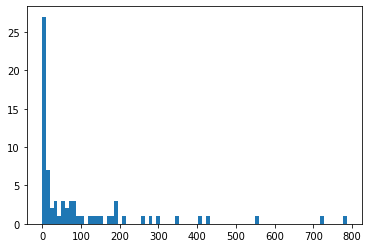

In [11]:
plt.hist(list_len, bins = 80)

In [6]:
df16 = df_working.query('year == 16 and Studienjahr >= 2 and status_year_before == "I"')
df17 = df_working.query('year == 17 and Studienjahr >= 2 and status_year_before == "I"')
df18 = df_working.query('year == 18 and Studienjahr >= 2 and status_year_before == "I"')
df19 = df_working.query('year == 19 and Studienjahr >= 2 and status_year_before == "I"')

In [8]:
# 16_17
print_matrix(df16)

# 17_18
print_matrix(df17)

# 18_19
print_matrix(df18)

# 19_20
print_matrix(df19)

[0.19, 0.07, 0.61, 0.13]
[0.05, 0.24, 0.12, 0.59]
---------
[0.17, 0.06, 0.61, 0.15]
[0.04, 0.31, 0.11, 0.54]
---------
[0.18, 0.06, 0.63, 0.13]
[0.05, 0.25, 0.13, 0.56]
---------
[0.19, 0.03, 0.64, 0.14]
[0.04, 0.13, 0.17, 0.66]
---------


## Berechnung der genauen Uebergangswahrscheinlichkeiten

In [9]:
df_test = df_working.copy(deep = True)

In [10]:
df_2 = df_test.query('Studienjahr == 2 and status_year_before == "I"')
df_3 = df_test.query('Studienjahr == 3 and status_year_before == "I"')
df_4 = df_test.query('Studienjahr == 4 and status_year_before == "I"')
df_5 = df_test.query('Studienjahr == 5 and status_year_before == "I"')
df_6 = df_test.query('Studienjahr == 6 and status_year_before == "I"')
df_7 = df_test.query('Studienjahr == 7 and status_year_before == "I"')
df_8 = df_test.query('Studienjahr == 8 and status_year_before == "I"')
df_9 = df_test.query('Studienjahr >= 9 and status_year_before == "I"')

In [11]:
print_matrix(df_2)

print_matrix(df_3)

print_matrix(df_4)

print_matrix(df_5)

print_matrix(df_6)

print_matrix(df_7)

print_matrix(df_8)

print_matrix(df_9)

[0.03, 0.13, 0.74, 0.11]
[0.02, 0.36, 0.21, 0.41]
---------
[0.14, 0.05, 0.7, 0.11]
[0.01, 0.36, 0.13, 0.5]
---------
[0.29, 0.03, 0.6, 0.08]
[0.02, 0.33, 0.18, 0.47]
---------
[0.28, 0.02, 0.59, 0.11]
[0.03, 0.29, 0.19, 0.49]
---------
[0.32, 0.02, 0.48, 0.18]
[0.08, 0.2, 0.21, 0.52]
---------
[0.3, 0.02, 0.46, 0.22]
[0.12, 0.15, 0.15, 0.59]
---------
[0.25, 0.02, 0.45, 0.28]
[0.09, 0.13, 0.11, 0.66]
---------
[0.21, 0.02, 0.38, 0.38]
[0.06, 0.13, 0.06, 0.75]
---------


In [12]:
df_jus = df_test.query('Studienjahr >= 2 and jus_dummy == 1 and status_year_before == "I"')
df_bwl = df_test.query('Studienjahr >= 2 and bwl_dummy == 1 and status_year_before == "I"')
df_pad = df_test.query('Studienjahr >= 2 and jus_dummy == 0 and bwl_dummy == 0 and status_year_before == "I"')

In [13]:
print_matrix(df_jus)
print_matrix(df_bwl)
print_matrix(df_pad)

[0.12, 0.04, 0.68, 0.15]
[0.06, 0.19, 0.15, 0.6]
---------
[0.27, 0.05, 0.56, 0.12]
[0.02, 0.27, 0.1, 0.61]
---------
[0.26, 0.09, 0.54, 0.12]
[0.04, 0.3, 0.12, 0.54]
---------


In [14]:
df_styria = df_test.query('Studienjahr >= 2 and styria_dummy == 1 and status_year_before == "I"')
df_not_styria = df_test.query('Studienjahr >= 2 and not_styria_dummy == 1 and status_year_before == "I"')
df_germany = df_test.query('Studienjahr >= 2 and germany_dummy == 1 and status_year_before == "I"')
df_foreign = df_test.query('Studienjahr >= 2 and other_foreign_dummy == 1 and status_year_before == "I"')

In [15]:
print_matrix(df_styria)
print_matrix(df_not_styria)
print_matrix(df_germany)
print_matrix(df_foreign)

[0.18, 0.06, 0.62, 0.14]
[0.04, 0.24, 0.13, 0.59]
---------
[0.19, 0.05, 0.64, 0.12]
[0.06, 0.23, 0.13, 0.58]
---------
[0.17, 0.17, 0.41, 0.25]
[0.02, 0.29, 0.08, 0.61]
---------
[0.16, 0.04, 0.63, 0.16]
[0.03, 0.26, 0.21, 0.5]
---------


In [16]:
df_firstGen = df_test.query('Studienjahr >= 2 and firstGen == 1 and status_year_before == "I"')
df_zeroGen = df_test.query('Studienjahr >= 2 and firstGen == 0 and status_year_before == "I"')

In [17]:
print_matrix(df_firstGen)
print_matrix(df_zeroGen)

[0.16, 0.06, 0.67, 0.11]
[0.03, 0.21, 0.19, 0.58]
---------
[0.13, 0.05, 0.69, 0.13]
[0.02, 0.24, 0.22, 0.52]
---------


### This is bad practice, because I loose Information, when I don't take every value.

In [18]:
df_nonparallel = df_test.query('Studienjahr >= 2 and num_parallel_studies == 0 and status_year_before == "I"')
df_oneparallel = df_test.query('Studienjahr >= 2 and num_parallel_studies == 1 and status_year_before == "I"')
df_moreparallel = df_test.query('Studienjahr >= 2 and num_parallel_studies >= 2 and status_year_before == "I"')

In [19]:
len(df_moreparallel)

1024

In [20]:
print_matrix(df_nonparallel)
print_matrix(df_oneparallel)
print_matrix(df_moreparallel)

[0.22, 0.06, 0.6, 0.12]
[0.06, 0.34, 0.14, 0.46]
---------
[0.0, 0.0, 0.76, 0.24]
[0.0, 0.0, 0.12, 0.88]
---------
[0.0, 0.0, 0.71, 0.29]
[0.0, 0.0, 0.07, 0.93]
---------


In [26]:
# df_small = []
# df_big = []

# for i in df_list:
#     if len(i[1]) < 10:
#         df_small.append(i)
#     else:
#         df_big.append(i)



In [2]:
# count = 0
# for i in df_big:
#     count += len(i[1])
    
# count
    

In [3]:
# from sklearn.linear_model import LinearRegression

# def perform_regression(df):
#     x = np.array([15,16,17,18,19])
#     y = []
#     for i in x:
#         y.append(len(df.query('Studienjahr == 1 and year == @i')))
#     model = LinearRegression()
#     model.fit(x.reshape(-1,1), y)
# #     predicted_years = np.array([20,21])
#     predicted_years = x
#     answer = model.predict(predicted_years.reshape(-1,1))
#     return answer

In [1]:
# df_steigend = []
# df_fallend = []

# for i in df_big:
#     if len(i[1].query('year == 19')) < perform_regression(i[1])[0]:
#         df_steigend.append(i)
#     else:
#         df_fallend.append(i)
        
# test = df_big[31][1]
# y = []
# for year in [15, 16, 17, 18, 19]:
#     y.append(len(test.query('Studienjahr == 1 and year == @year')))
#     print(len(test.query('Studienjahr == 1 and year == @year')))

# perform_regression(test)
# plt.plot([15, 16, 17, 18, 19], y)
# plt.plot([15, 16, 17, 18, 19], perform_regression(test))